<a href="https://colab.research.google.com/github/Innoc3nnt/Numerical-analysis/blob/master/week_5_intep_approx_ipynb_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Linear least squares approximation

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [4]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [5]:
# ... ENTER YOUR CODE HERE
def design_matrix(x, m):
  n = len(x)
  matrix = np.zeros((n, m))
  for i in range(n):
    for j in range(m):
      if j != 0:
        matrix[i][j] = x[i] ** j
      else:
        matrix[i][j] = 1
  return matrix

In [6]:
def solve_normal_equasion(A, y):
  left = A.T.dot(A)
  right = A.T.dot(y)
  return np.linalg.solve(left, right)

In [7]:
def build_polynoms(A, beta):
  ans = A.copy()
  for i in range(len(A)):
    for j in range(len(beta)):
      ans[i][j] *= beta[j]
  return [sum(ans[i]) for i in range(len(A))]

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

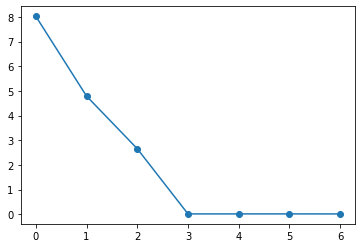

In [8]:
# ... ENTER YOUR CODE HERE ...
def find_optimal(x, y, max_m):
  sigma = []
  for i in range(1, max_m + 2):
    A = design_matrix(x, i)
    beta = solve_normal_equasion(A, y)
    y1 = build_polynoms(A, beta)
    sigma.append(1/(len(x) - i) * sum([(y1[k] - y[k]) ** 2 for k in range(len(y))]))
  plt.plot(sigma, 'o-')
  plt.show()
find_optimal(x, y, 6)


Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes curre

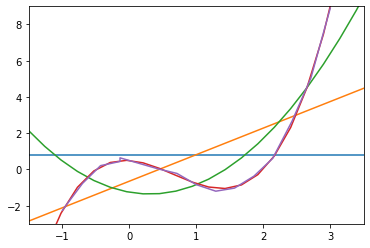

In [9]:
# ... ENTER YOUR CODE HERE
def plot_polynomes(x, y, max_m, func):
  x1 = np.linspace(-2, 10)
  for i in range(1, max_m + 2):
    A = design_matrix(x, i)
    beta = func(A, y)
    A1 = design_matrix(x1, i)
    y1 = build_polynoms(A1, beta)
    ax = plt.subplot()
    ax.label = str(i)
    ax.set_ylim(-3, 9)
    ax.set_xlim(-1.5, 3.5)
    ax.plot(x1, y1, label=str(i))
  ax.plot(x, y)
  plt.show()
plot_polynomes(x, y, 3, solve_normal_equasion)

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes curre

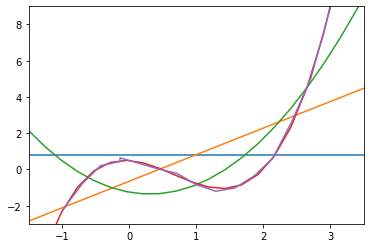

In [10]:
# ... ENTER YOUR CODE HERE ...
def qr(A, y):
  q, r = np.linalg.qr(A)
  f = q.T @ y
  return np.linalg.solve(r, f)
plot_polynomes(x, y, 3, qr)

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

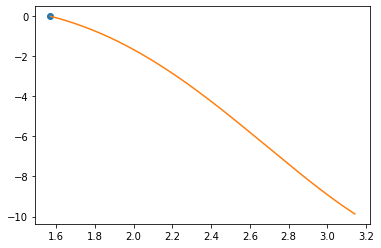

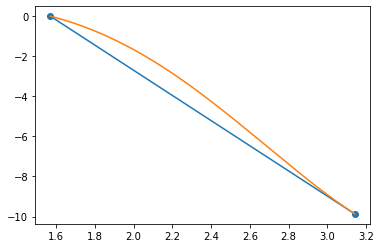

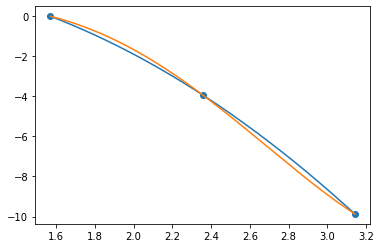

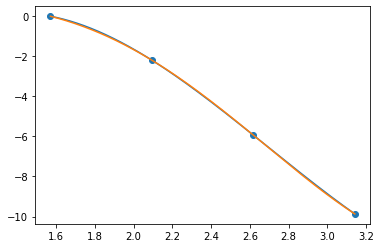

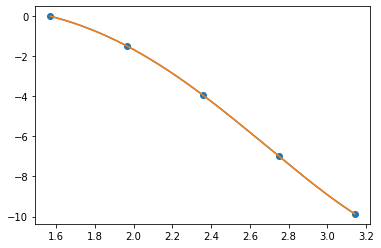

In [11]:
# ... ENTER YOUR CODE HERE ...
def fx(x):
  return x ** 2 * np.cos(x)

def get_equal_points(m):
  x0 = np.linspace(np.pi / 2, np.pi, m)
  y0 = [fx(x) for x in x0]
  return x0, y0

def interpolate(x0, y0, x):
  val = 0
  for i in range(len(y0)):
    l1 = 1
    l2 = 1
    for j in range(len(x0)):
      if i != j:
        l1 *= x - x0[j]
        l2 *= x0[i] - x0[j]
    val += y0[i] * l1 / l2
  return val

def print_interp(i, point_function):
  x0, y0 = point_function(i)
  x = np.linspace(np.min(x0), np.max(x0), 1000)
  y = [interpolate(x0, y0, k) for k in x]
  xp = np.linspace(np.pi / 2, np.pi, 1000)
  yp = [fx(x) for x in xp]
  plt.plot(x, y)
  plt.scatter(x0, y0)
  plt.plot(xp, yp)
  plt.show()

for i in range(1, 6):
  print_interp(i, get_equal_points)

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

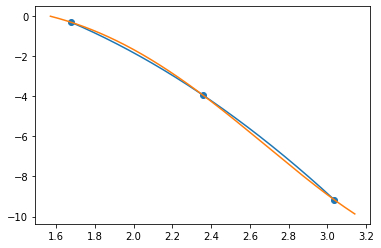

In [13]:
# ... ENTER YOUR CODE HERE ...
def node(x, depth=0):
  if depth == 0:
    return 1
  if depth == 1:
    return x
  else:
    return 2 * x * node(x, depth-1) - node(x, depth-2)

def nodes(n):
  a=np.pi/2
  b=np.pi
  xk = [1 / 2 * (a + b ) + 1 / 2 * (b - a) * np.cos((2 * i + 1) / (2 * n) * np.pi) for i in range(0, n)]
  yk = y0 = [fx(x) for x in xk]
  return xk, yk

print_interp(3, nodes)
